In [5]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np

In [8]:
DATADIR="D:\\machine learning\\catanddog\\catanddog\\test_set"
CATAGORIES=['cats','dogs']

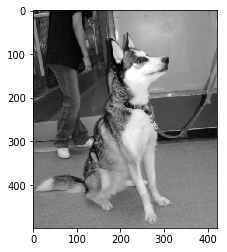

In [43]:
for catagories in CATAGORIES:
    path=os.path.join(DATADIR,catagories)
    
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap="gray")
        plt.show
        break
    

In [10]:
IMG_SIZE=32

In [11]:
dataset=[]
def create_training_data():
    for catagories in CATAGORIES:
        path=os.path.join(DATADIR,catagories)
        class_num=CATAGORIES.index(catagories)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
            dataset.append([new_array,class_num])
            
create_training_data()  

In [12]:
len(dataset)

2023

In [13]:
import random
random.shuffle(dataset)

In [14]:
X=[]
Y=[]

for feature ,label in dataset:
    X.append(feature)
    Y.append(label)

In [15]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [16]:
X.shape

(2023, 32, 32, 1)

In [17]:
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

Using TensorFlow backend.


In [18]:
Y=to_categorical(Y)

In [19]:
Y.shape

(2023, 2)

In [20]:
X=X/255

In [21]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras.callbacks import TensorBoard
model=Sequential()


In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [28]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])

In [29]:
model.fit(X,Y, batch_size = 32, epochs =10)

Epoch 1/10
2023/2023 [==============================] - 33s 16ms/step - loss: 0.6933 - acc: 0.4973
Epoch 2/10
2023/2023 [==============================] - 32s 16ms/step - loss: 0.6930 - acc: 0.5220
Epoch 3/10
2023/2023 [==============================] - 30s 15ms/step - loss: 0.6932 - acc: 0.4923
Epoch 4/10
2023/2023 [==============================] - 28s 14ms/step - loss: 0.6932 - acc: 0.4988
Epoch 5/10
2023/2023 [==============================] - 28s 14ms/step - loss: 0.6931 - acc: 0.4973
Epoch 6/10
2023/2023 [==============================] - 28s 14ms/step - loss: 0.6931 - acc: 0.5032
Epoch 7/10
2023/2023 [==============================] - 28s 14ms/step - loss: 0.6931 - acc: 0.5002
Epoch 8/10
2023/2023 [==============================] - 29s 14ms/step - loss: 0.6931 - acc: 0.5017
Epoch 9/10
2023/2023 [==============================] - 30s 15ms/step - loss: 0.6936 - acc: 0.4770
Epoch 10/10
2023/2023 [==============================] - 28s 14ms/step - loss: 0.6933 - acc: 0.4998


In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=45,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=True)

In [40]:
datagen.fit(X)

In [41]:
model.fit_generator(datagen.flow(X, Y, batch_size = 32),
                    steps_per_epoch = len(X) / 32, # number of samples per gradient update
                    epochs = 3, # number of iterations
                    validation_data= (X, Y),
                    verbose=1)

Epoch 1/3
64/63 [==============================] - 36s 563ms/step - loss: 0.6820 - acc: 0.5617 - val_loss: 0.6783 - val_acc: 0.5699
Epoch 2/3
64/63 [==============================] - 36s 567ms/step - loss: 0.6834 - acc: 0.5504 - val_loss: 0.6631 - val_acc: 0.6011
Epoch 3/3
64/63 [==============================] - 43s 676ms/step - loss: 0.6841 - acc: 0.5509 - val_loss: 0.6647 - val_acc: 0.6036
